In [ ]:
#### Importing Data  ####

import pandas as pd
column_names_if_not_present_with_data = ['name1','name2',...]
dataset = pd.read_csv("link / file with extension in same working directory", names = column_names_if_not_present_with_data,sep = ",")
#sep = specifies the seperator used to seperate values of 2 different columns - ","(def.), "/t"(for space) , ";",etc 

dataset = pd.read_csv("link / file with extension in same working directory", header = None)
#if there are too many columns whose name we cannot specify ,then pandas itself specify their column names as 0,1,2,... iff header = None

pd.read_fwf("file with extension") - for fixed width files
pd.read_excel("excel file with .xls") 
pd.read_clipboard("clipboard file with extension")

In [ ]:
## Naive Exploration 
data.shape - dimension (m rows,n col)
data.info() - basic info abt data
data.describe() - statistical summary of data
data.head() - 1st 5 enteries
data.tail() - last 5 enteries
data.sample(6)  - random 6 enteries (int value can be changed)

## Data Accessing 
'col_name_if_its_a_string'  and  col_name_if_its_int_or_float
data['col_name_if_its_a_string'] ,data[col_name_if_its_int_or_float] - accessing specific cols
data[['col_name1','col_name2','col_name3',..]] -customised col selection 
data.iloc[:,col_index_strt:col_index_end+1:step_size] - sequential col selection
data[row_index_strt:row_index_end+1:step_size] - sequential row selection 

data = pd.DataFrame(container) - to convert into pandas dataframe
type(container_or_its_variable) - to know datatype of any container we want to know
container - int,foat,string,bool,pandas dataframe, pandas series, numpy arrays 

In [1]:
import pandas as pd
from io import StringIO
csv_data ='''A,B,C,D
            1.,2.,3.,4.
            5.,6.,,8.
            0.,11.,12,'''
df = pd.read_csv(StringIO(csv_data))

In [5]:
#### Missing Values ####

#Determining NaN (missing) values in each column 
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

In [87]:
### Eliminating full column / rows containing Missing Values

##To drop rows 
df = df.dropna() #temp action, needed to be saved - mostly used

##To drop columns 
df = df.dropna(axis=1) 

##Other parameters of dropna() 
#thresh = int value - atleast thresh NaN values


,A,B
0,1.0,2.0
1,5.0,6.0
2,0.0,11.0


In [ ]:
###Imputing Missing Values

from sklearn.preprocessing import Imputer as imp
imr =imp(missing_values ='NaN',strategy = 'mean',axis =0) #axis =0 for column computation (preferred)
#Other strategy = 'median'/'most_frequent'                #axis =1 for row computation
imputed_data = imr.fit(df).transform(df)
col_names = df.columns
df = pd.DataFrame(imputed_data)
df.columns = col_names


In [80]:
import pandas as pd
df = pd.DataFrame([['green', 'M', 10.1, 'class1'],['red', 'L', 13.5, 'class2'],['blue', 'XL', 15.3, 'class1']])
df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


In [83]:
#### Categorical Data ####

###To find unique values in specific column 
df['classlabel'].unique()

### Encoding Output Column 
from sklearn import preprocessing as pre
label_encode = pre.LabelEncoder()
label_encode.fit(df['classlabel'])
encoded_label = label_encode.transform(df['classlabel'])
df = df.iloc[:,:3]
df['encoded_class'] = encoded_label
df

## Decoding Output Column
decoded_labels = label_encode.inverse_transform(encoded_label)

,color,size,price,encoded_class
0,green,M,10.1,0
1,red,L,13.5,1
2,blue,XL,15.3,0


In [84]:
### Creating Dummy Features for Input Columns
pd.get_dummies(df) #temp 

,price,encoded_class,color_blue,color_green,color_red,size_L,size_M,size_XL
0,10.1,0,0.0,1.0,0.0,0.0,1.0,0.0
1,13.5,1,0.0,0.0,1.0,1.0,0.0,0.0
2,15.3,0,1.0,0.0,0.0,0.0,0.0,1.0


In [43]:
#### Partioning Dataset into Train & Test ####

#In ML Competitions X,y are seperately given 

import pandas as pd
col_names = ['Class label', 'Alcohol','Malic acid', 'Ash','Alcalinity of ash', 'Magnesium','Total phenols', 'Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity', 'Hue','OD280/OD315 of diluted wines','Proline']
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', names =col_names)

from sklearn.model_selection import train_test_split as tts
X,y = data.iloc[:,1:],data['Class label']
X_train,X_test,y_train,y_test = tts(X,y,test_size = 0.25,random_state =42)

In [41]:
#### Feature Scaling ####

### Standardization - mostly used
#Data Centered around Zero with Std. Deviation =1

from sklearn.preprocessing import StandardScaler as ss
std_scaler = ss()
X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.transform(X_test)
X_train = pd.DataFrame(X_train)
X_train.columns = data.columns[1:] #it contains list of column names of dataframe
X_test = pd.DataFrame(X_test)
X_test.columns = X_train.columns

### Normalization - can be tried 
#Data ranges from 0-1

from sklearn.preprocessing import MinMaxScaler as mms
norm_scaler = mms()
X_train = norm_scaler.fit_transform(X_train)
X_test = norm_scaler.transform(X_test)
X_train = pd.DataFrame(X_train)
X_train.columns = data.columns[1:]
X_test = pd.DataFrame(X_test)
X_test.columns = X_train.columns

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,0.560526,0.299389,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.756329,0.434879,0.447154,0.695971,0.714736
1,0.276316,0.242363,0.181818,0.355670,0.293478,0.431034,0.386076,0.245283,0.310127,0.172185,0.642276,0.619048,0.340426
2,0.365789,0.720978,0.732620,0.819588,0.347826,0.420690,0.377637,0.566038,0.408228,0.037528,0.357724,0.677656,0.068558
3,0.407895,0.081466,0.395722,0.484536,0.358696,0.172414,0.050633,0.754717,0.310127,0.646799,0.081301,0.102564,0.285264
4,0.736842,0.154786,0.663102,0.340206,0.260870,0.506897,0.559072,0.169811,0.591772,0.426049,0.617886,0.769231,0.777778


 1) Alcohol                        0.177169
 2) Malic acid                     0.156223
 3) Ash                            0.149697
 4) Alcalinity of ash              0.130620
 5) Magnesium                      0.115294
 6) Total phenols                  0.074780
 7) Flavanoids                     0.059027
 8) Nonflavanoid phenols           0.034903
 9) Proanthocyanins                0.027099
10) Color intensity                0.026618
11) Hue                            0.024895
12) OD280/OD315 of diluted wines   0.014139
13) Proline                        0.009537


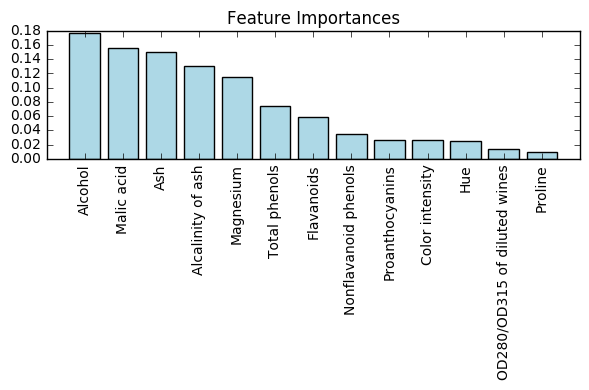

,Alcohol,Malic acid,Ash
0,0.560526,0.299389,0.700535
1,0.276316,0.242363,0.181818
2,0.365789,0.720978,0.732620
3,0.407895,0.081466,0.395722
4,0.736842,0.154786,0.663102


In [45]:
#### Avoiding Overfitting ####

# when, Performace on Train Data is >>> Test Data (no generalization)

### Feature Importance via Random Forests

import numpy as np
from sklearn.ensemble import RandomForestClassifier as rfc
feat_labels = data.columns[1:]
forest = rfc(n_estimators=10000,random_state=0,n_jobs=-1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_

indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print(("%2d) %-*s %f" % (f + 1, 30,feat_labels[f],importances[indices[f]])))

import matplotlib.pyplot as plt
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]),importances[indices],color='lightblue',align='center')
plt.xticks(range(X_train.shape[1]),feat_labels, rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

# We can now consider only 3/4 most important columns into consideration 
X_train_new = X_train[['Alcohol','Malic acid','Ash']]
X_train_new.head()

In [60]:
#### Dimensionality Reduction ####

### PCA -Unsupervided Learning

from sklearn.decomposition import PCA
pca = PCA(n_components=5) #n_components decides the resultant dimension of dataset
X_train_pca = pca.fit_transform(X_train)
X_train =pd.DataFrame(X_train_pca) 
# X_train reduced to 5 columns 

### LDA -Supervised Learning
from sklearn.lda import LDA
lda = LDA()
X_train_lda = lda.fit_transform(X_train, y_train)

X_train =pd.DataFrame(X_train_lda) 


# X_train reduced to 2 columns (always)

### Kernel PCA
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components=4,kernel='rbf', gamma=15) #n_components decides the resultant dimension of dataset
X_train_kpca = kpca.fit_transform(X_train)
X_train =pd.DataFrame(X_train_kpca) 



In [183]:
######################## EXAMPLE ##########################

## Importing Data
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data',header = None)

In [184]:
## Encoding Output Column 
from sklearn import preprocessing as pre
label_encode = pre.LabelEncoder()
label_encode.fit(df[1])
encoded_label = label_encode.transform(df[1])

In [196]:
data = data.drop(1) 
# Drop column  - data =data.drop('col_name',axis =1) | data = data.drop(col_name_if_int)
#Drop multiple columns - data= data.drop(['col_name1','col_name2',..],axis =1)

data1 = df.iloc[:,2:]
data2 = df.iloc[:,0] #selecting particular column
data =data1.join(data2) #to join 2 dataframes
data['class'] = encoded_label
data.head()

,2,3,4,5,6,7,8,9,10,11,...,24,25,26,27,28,29,30,31,0,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,842302,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,842517,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,84300903,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,84348301,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,84358402,1


In [195]:
## Partitioning Data
from sklearn.model_selection import train_test_split as tts
X,y = data.iloc[:,:32],data['class']
X_train,X_test,y_train,y_test = tts(X,y,test_size = 0.25,random_state =42)
X_train.head()

,2,3,4,5,6,7,8,9,10,11,...,24,25,26,27,28,29,30,31,0,class
287,12.89,13.12,81.89,515.9,0.06955,0.03729,0.02260,0.01171,0.1337,0.05581,...,87.40,577.0,0.09616,0.1147,0.1186,0.05366,0.2309,0.06915,8913,0
512,13.40,20.52,88.64,556.7,0.11060,0.14690,0.14450,0.08172,0.2116,0.07325,...,113.30,844.4,0.15740,0.3856,0.5106,0.20510,0.3585,0.11090,915691,1
402,12.96,18.29,84.18,525.2,0.07351,0.07899,0.04057,0.01883,0.1874,0.05899,...,96.31,621.9,0.09329,0.2318,0.1604,0.06608,0.3207,0.07247,904689,0
446,17.75,28.03,117.30,981.6,0.09997,0.13140,0.16980,0.08293,0.1713,0.05916,...,145.40,1437.0,0.14010,0.3762,0.6399,0.19700,0.2972,0.09075,9110732,1
210,20.58,22.14,134.70,1290.0,0.09090,0.13480,0.16400,0.09561,0.1765,0.05024,...,158.30,1656.0,0.11780,0.2920,0.3861,0.19200,0.2909,0.05865,881046502,1


In [ ]:
__TADA__